In [1]:
from sys import path
path.append('./spineSimulator/')
import plot
from importlib import reload
reload(plot)

<module 'plot' from '/home/work/Projects/spineCableSimulation/code/./spineSimulator/plot.py'>

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load 20 ms run 

In [9]:
# AMPA current intput to segments 1 in spine head
results_file = './../simulation_results/full_run_test1_11082022.pcl'
results = pickle.load(open(results_file, 'rb'))

In [10]:
t = list(results['data'].keys())
phi = np.array([results['data'][ti]['phi'] for ti in t])
c_Na = np.array([results['data'][ti]['c_Na'] for ti in t])
c_K = np.array([results['data'][ti]['c_K'] for ti in t])
c_Cl = np.array([results['data'][ti]['c_Cl'] for ti in t])
x = results['params']['x']
xx, tt = np.meshgrid(x,t)

In [14]:
print(np.shape(phi))

(401, 16)


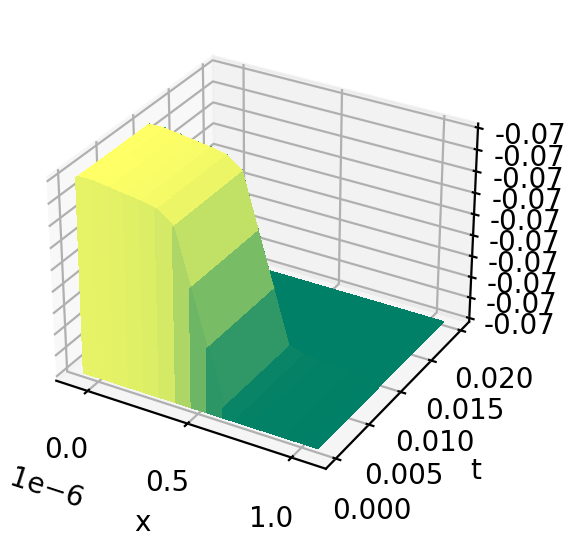

In [15]:
fig = plt.figure(dpi=200, figsize=(3,3))
pos = [0.1,0.1,0.8,0.8]
plot.surface(fig, pos, xx, tt, phi)
plt.show()

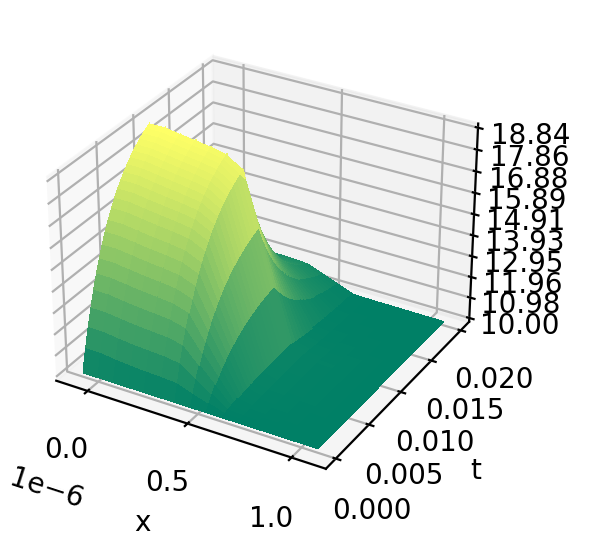

In [16]:
fig = plt.figure(dpi=200, figsize=(3,3))
pos = [0.1,0.1,0.8,0.8]
plot.surface(fig, pos, xx, tt, c_Na)
plt.show()

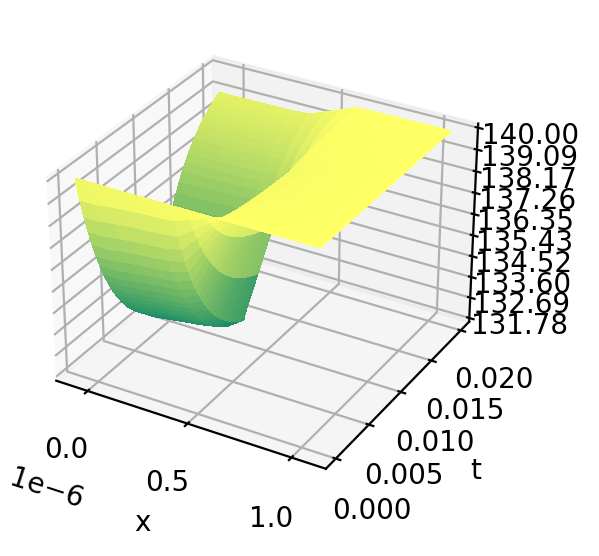

In [17]:
fig = plt.figure(dpi=200, figsize=(3,3))
pos = [0.1,0.1,0.8,0.8]
plot.surface(fig, pos, xx, tt, c_K)
plt.show()

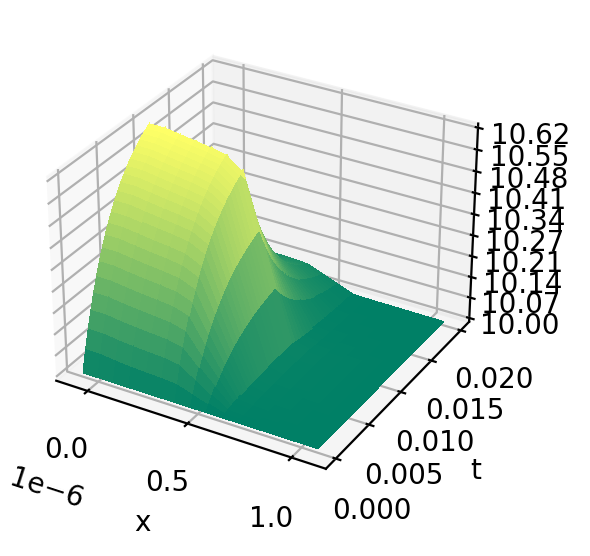

In [18]:
fig = plt.figure(dpi=200, figsize=(3,3))
pos = [0.1,0.1,0.8,0.8]
plot.surface(fig, pos, xx, tt, c_Cl)
plt.show()

# How strong can concentrations change for different parameters?
# What is the effect of different diffusion constants for Na+ and K+?